In [ ]:
!curl -L "https://universe.roboflow.com/ds/hzf5yklOnF?key=qAUnSECvfR" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [2]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 11996, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 11996 (delta 20), reused 23 (delta 8), pack-reused 11953
Receiving objects: 100% (11996/11996), 12.51 MiB | 19.21 MiB/s, done.
Resolving deltas: 100% (8244/8244), done.


In [ ]:
%cd /content/yolov5/
!pip install -r requirements.txt

In [5]:
%cat /content/dataset/data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['pistol']

In [6]:
# root로 변환
%cd / 
from glob import glob

img_list = glob('/content/dataset/export/images/*.jpg')
print(len(img_list))

/
2971


In [7]:
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(img_list, test_size = 0.2, random_state = 2000)

print(len(train_img_list), len(val_img_list))

2376 595


In [9]:
with open('/content/dataset/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')

with open('/content/dataset/val.txt', 'w') as f:
    f.write('\n'.join(val_img_list) + '\n')

In [12]:
import yaml

with open('/content/dataset/data.yaml', 'r') as f:
    data = yaml.safe_load(f)

print(data)

data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'

with open('/content/dataset/data.yaml', 'w') as f:
    yaml.dump(data, f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'nc': 1, 'names': ['pistol']}
{'train': '/content/dataset/train.txt', 'val': '/content/dataset/val.txt', 'nc': 1, 'names': ['pistol']}


In [13]:
%cd /content/yolov5/

!python train.py --img 416 --batch 16 --epochs 50 --data /content/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name gun_yolov5s_results

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=gun_yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-53-gf0e5a60 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs/

In [17]:
from IPython.display import Image
import os

val_img_path = val_img_list[0]

!python detect.py --weights /content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt --img 416 --conf 0.5 --source "{val_img_path}"

detect: weights=['/content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt'], source=/content/dataset/export/images/armas (2441)_jpg.rf.4e449493e732c9f33f187e6e46f1a995.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.2-53-gf0e5a60 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/dataset/export/images/armas (2441)_jpg.rf.4e449493e732c9f33f187e6e46f1a995.jpg: 416x416 1 pistol, 8.2ms
Speed: 0.4ms pre-process, 8.2ms inference, 1.2ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp


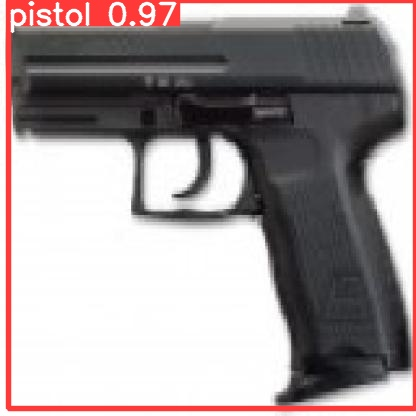

In [19]:
Image(os.path.join('/content/yolov5/runs/detect/exp', os.path.basename(val_img_path)))